## Defining Symbols and Symbolic Operations

*Symbols* form the building blocks of *symbolic math*. The term symbol is just a general name for the $xs$, $ys$, $as$, and $bs$ you use in equations and algebraic expressions. Creating and using symbols will let us do things differently than before. Consider the following statements:

In [1]:
x = 1
x+x+1

3

Here we create a label, $x$, to refer to the number 1. Then, when we write the statement $x + x + 1$, it’s evaluated for us, and the result is 3. 

* What if you wanted the result in terms of the symbol $x$? That is, if instead of 3, you wanted Python to tell you that the result is $2x + 1$? 

You couldn’t just write $x + x + 1$ without the statement $x = 1$ because Python wouldn’t know what $x$ refers to. 

**SymPy** lets us write programs where we can express and evaluate mathematical expressions in terms of such symbols. To use a symbol in your program, you have to create an object of the Symbol class, like this:

In [3]:
from sympy import Symbol
x = Symbol('x')

* First, we import the *Symbol class* from the *sympy library*. 
* Then, we **create an object** of this class passing $'x'$ as a parameter. 
* Note that this $'x'$ is written as a string within quotes. 

We can now define expressions and equations in terms of this symbol. For example, here’s the earlier expression:

In [4]:
x + x + 1

2*x + 1

In the statement $x = Symbol('x')$, the $x$ on the left side is the Python label. So, it’s perfectly fine to write the preceding statements as follows:

In [6]:
a = Symbol('x')
a + a + 1

2*x + 1

Using a non-matching label can be confusing, however, so I would recommend **choosing a label that’s the same letter as the symbol** it refers to.

For any Symbol object, its name attribute is a string that is the actual symbol it represents:

In [21]:
a = Symbol('x')
a.name

'x'

To define multiple symbols, you can either create separate Symbol objects or use the $symbols()$ function to define them more concisely. Let’s say you wanted to use three symbols—$x$, $y$, and $z$—in your program. You could define them individually, as we did earlier:

In [10]:
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

But a shorter method would be to use the $symbols()$ function to define all three at once:

In [11]:
from sympy import symbols
x,y,z = symbols('x,y,z')

Once you’ve defined symbols, you can carry out basic mathematical operations on them. For example, you might do the following:

In [15]:
z = x*y + x*y
z

2*x*y

Let’s see whether we can find the product of $x(x + x)$:

In [17]:
z = x*(x + x)
z

2*x**2

Let’s see what happens when we enter the expression $(x + 2)*(x + 3)$:

In [18]:
z = (x + 2)*(x + 3)
z

(x + 2)*(x + 3)

You may have expected *SymPy* to multiply everything out. Instead, the expression was printed exactly how we entered it. *SymPy* automatically **simplifies** only the **most basic of expressions** and leaves it to the programmer to explicitly require simplification in cases such as the preceding one.

In [27]:
from sympy import expand
expand(z)

x**2 + 5*x + 6

## Factorizing and Expanding Expressions

The *factor()* function decomposes an expression into its factors, and the *expand()* function expands an expression, expressing it as a sum of individual terms. Let’s test out these functions with the basic algebraic identity $x^2 − y^2 = (x + y)(x − y)$. The left side of the identity is the **expanded version**, and the right side depicts the corresponding **factorization**. Because we have two symbols in the identity, we’ll create two Symbol objects:

In [22]:
from sympy import Symbol
x = Symbol('x')
y = Symbol('y')

Next, we import the *factor()* function and use it to convert the expanded version (on the left side of the identity) to the factored version (on the right side):

In [23]:
from sympy import factor
expr = x**2 - y**2
factor(expr)

(x - y)*(x + y)

As expected, we get the factored version of the expression. Now let’s expand the factors to get back the original expanded version:

In [26]:
from sympy import expand
factors = factor(expr)
expand(factors)

x**2 - y**2

We store the factorized expression in a new label, **factors**, and then call the *expand()* function with it. When we do this, we receive the original expression we started with. Let’s try it with the more complicated identity $x^3 + 3x^2y + 3xy^2 + y3 = (x + y)^3$:

In [31]:
expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
factors = factor(expr)
factors

(x + y)**3

## Pretty Printing

If you want the expressions we’ve been working with to look a bit nicer when you print them, you can use the *pprint()* function. This function will print the expression in a way that more closely resembles how we’d normally write it on paper. For example, here’s an expression:

In [32]:
from sympy import pprint
expr = x*x + 2*x*y + y*y
expr

x**2 + 2*x*y + y**2

You can also change the order of the terms when you print an expression. Consider the expression $1 + 2x + 2x^2$:

In [33]:
expr = 1 + 2*x + 2*x**2
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


The terms are arranged in the order of powers of $x$, from highest to lowest. If you want the expression in the opposite order, with the highest power of $x$ last, you can make that happen with the *init_printing()* function, as follows:

In [34]:
from sympy import init_printing
init_printing(order='rev-lex')
pprint(expr)

             2
1 + 2⋅x + 2⋅x 


## Printing a Series

Consider the following series:

$$ x+\frac{x^{2}}{2}+\frac{x^{3}}{3}+\frac{x^{4}}{4}+...+\frac{x^{n}}{n} $$

Let’s write a program that will ask a user to input a number, n, and print this series for that number. In the series, x is a symbol and $n$ is an integer input by the program’s user. The $n$th term in this series is given by:

$$ \frac{x^{n}}{n} $$

We can print this series using the following program:

In [42]:
from sympy import Symbol, pprint, init_printing

# Initialize printing system with reverse order
init_printing(order='rev-lex')

n = 6
x = Symbol('x')
series = x
for i in range(2, n+1):
    series = series + (x**i)/i

pprint(series)

     2    3    4    5    6
    x    x    x    x    x 
x + ── + ── + ── + ── + ──
    2    3    4    5    6 


## Substituting in Values

Let’s see how we can use *SymPy* to plug values into an algebraic expression. This will let us calculate the value of the expression for certain values of the variables. Consider the mathematical expression $x^2 + 2xy + y^2$, which can be defined as follows:

In [45]:
x = Symbol('x')
y = Symbol('y')
expr = x*x + x*y + x*y + y*y
expr

If you want to evaluate this expression, you can substitute numbers in for the symbols using the *subs()* method:

In [47]:
res = expr.subs({x:1, y:2})
res

You can also express one symbol in terms of another and substitute accordingly, using the *subs()* method. For example, if you knew that $x = 1 − y$, here’s how you could evaluate the preceding expression:

In [48]:
expr.subs({x:1-y})

If you want the result to be simplified further—for example, if there are terms that cancel each other out, we can use SymPy’s *simplify()* function, as follows:

In [49]:
expr_subs = expr.subs({x:1-y})
from sympy import simplify
simplify(expr_subs)

## Converting Strings to Mathematical Expressions

So far, we’ve been writing out individual expressions each time we want to do something with them. However, what if you wanted to write a more general program that could manipulate any expression provided by the user? For that, we need a way to convert a user’s input, which is a string, into something we can perform mathematical operations on. SymPy’s sympify() function helps us do exactly that. The function is so called because it converts the string into a SymPy object that makes it possible to apply SymPy’sfunctions to the input. Let’s see an example:

In [53]:
from sympy import sympify

# Enter this expression in checkbox : x**2 + 3*x + x**3 + 2*x
expr = input('Enter a mathematical expression: ')

Enter a mathematical expression:  x**2 + 3*x + x**3 + 2*x


In [52]:
expr = sympify(expr)
expr

## Solving Equations

SymPy’s *solve()* function can be used to find solutions to equations. When you input an expression with a symbol representing a variable, such as $x$, *solve()* calculates the value of that symbol. This function always makes its calculation by assuming the expression you enter is equal to zero—that is, it prints the value that, when substituted for the symbol, makes the entire expression equal zero. Let’s start with the simple equation $x − 5 = 7$. If we want to use solve() to find the value of $x$, we first have to make one side of the equation equal zero $(x − 5 − 7 = 0)$. Then, we’re ready to use *solve()*, as follows:

In [54]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x - 5 - 7
solve(expr)

## Solving Quadratic Equations

Let’s see an example:

In [55]:
from sympy import solve
x = Symbol('x')
expr = x**2 + 5*x + 4
solve(expr, dict=True)

Let’s attempt another example:

In [56]:
x=Symbol('x')
expr = x**2 + x + 1
solve(expr, dict=True)

Let’s take a look at finding the roots for the generic quadratic equation $ax^2 + bx + c = 0$.

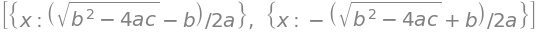

In [57]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')

expr = a*x*x + b*x + c
solve(expr, x, dict=True)

## Solving a System of Linear Equations

Consider the following two equations:

$$
\left\{\begin{matrix}
2x + 3y = 6\\ 
3x + 2y = 12
\end{matrix}\right.
$$

Say we want to find the pair of values $(x, y)$ that satisfies both the equations. We can use the *solve()* function to find the solution for a system of equations like this one. First, we define the two symbols and create the two equations:

In [59]:
x = Symbol('x')
y = Symbol('y')
expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12

solve((expr1, expr2), dict=True)

## Plotting Using SymPy

With SymPy, on the other hand, you can just tell SymPy the equation of the line you want to plot, and the graph will be created for you. Let’s plot a line whose equation is given by $y = 2x + 3$:



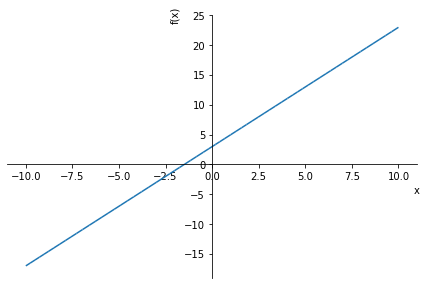

In [60]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3)

*SymPy* uses matplotlib behind the scenes to draw the graphs. Also note that we didn’t have to call the *show()* function to show the graphs because this is done automatically by *SymPy*.

Now, let’s say that you wanted to limit the values of $'x'$ in the preceding graph to lie in the range $−5$ to $5$ (instead of $−10$ to $10$). You’d do that as follows:

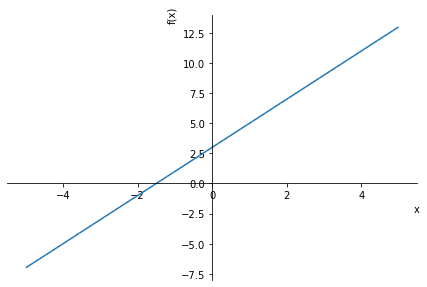

In [61]:
plot((2*x + 3), (x, -5, 5))

You can use other keyword arguments in the *plot()* function, such as title to enter a title or *xlabel* and *ylabel* to label the *x-axis* and the *y-axis*, respectively. The following *plot()* function specifies the preceding three keyword arguments

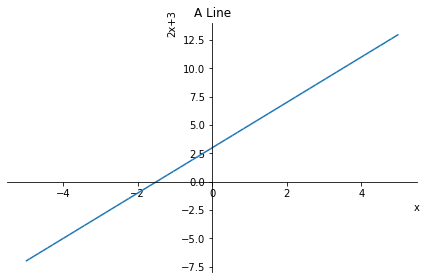

In [62]:
plot(2*x + 3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3')

The show keyword argument allows us to specify whether we want the graph to be displayed. Passing *show=False* will cause the graph to not be displayed when you call the *plot(* function:

In [63]:
p = plot(2*x + 3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3', show=False)

You will see that no graph is shown. The label $p$ refers to the plot that is created, so you can now call *p.show()* to display the graph. You can also save the graph as an image file using the *save()* method, as follows:

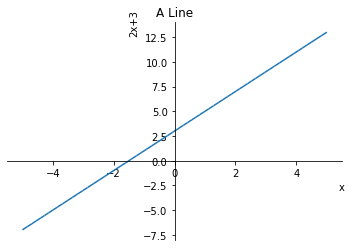

In [64]:
p.save('line.png')

## Plotting Multiple Functions

You can enter multiple expressions when calling the SymPy plot function to plot more than one expression on the same graph. For example, the following code plots two lines at once

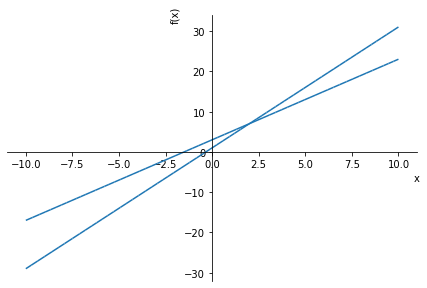

In [65]:
from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
plot(2*x+3, 3*x+1)

To set different colors for each line with SymPy, we’ll need to perform some extra steps, as shown in the following code, which also adds a legend to the graph:

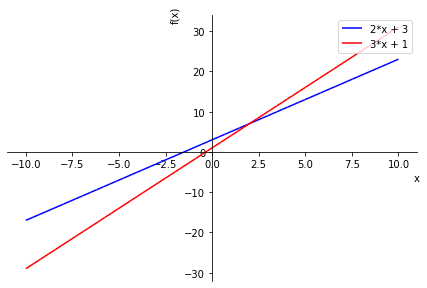

In [66]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')

p = plot(2*x+3, 3*x+1, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()